# Ejercicio 2

Existe una base de datos llamada MNIST que contiene imágenes de dígitos manuscritos:

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


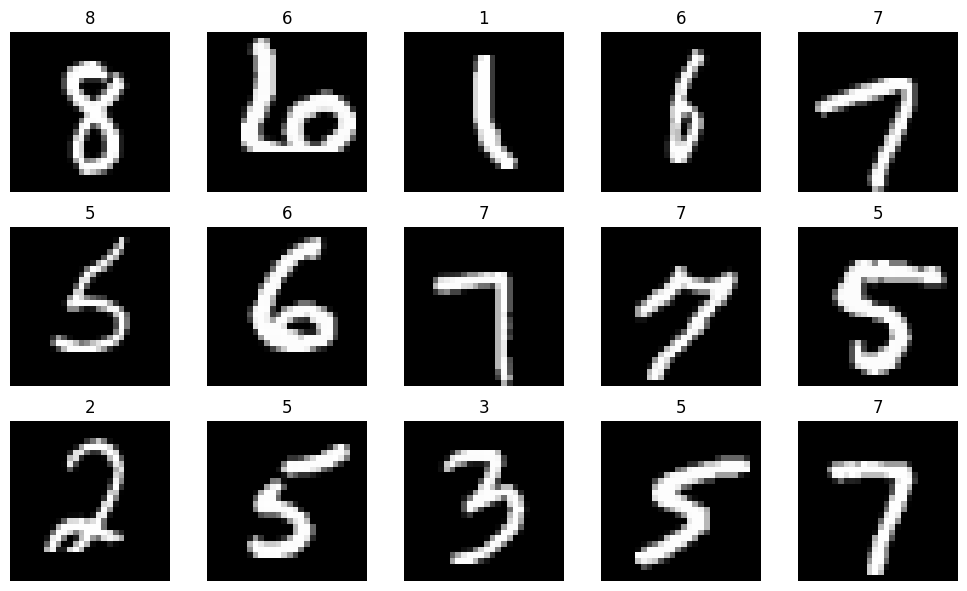

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Mostrar 15 ejemplos aleatorios
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = np.random.randint(0, len(X_train))
        img = X_train[ix]
        plt.subplot(r, c, _r*c + _c + 1)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(y_train[ix])
plt.tight_layout()
plt.show()


Normalice las imágenes del dataset y utilice la librería `scikitlearn` para crear un modelo que permita clasificar el dataset correctamente para indicar el valor representado en cada imagen.

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler

# Cargar el dataset MNIST
print("Cargando el dataset de imágenes...")
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Ver las dimensiones de los datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

# Aplanar las imágenes, convertir matrices 28x28 a vectores de 784
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)
print(f"Forma de X_train aplanado: {X_train_flattened.shape}")
print(f"Forma de X_test aplanado: {X_test_flattened.shape}")

# Normalizar los datos, escalarlos a valores entre 0 y 1
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

print("Datos normalizados en el rango [0, 1]")

Cargando el dataset de imágenes...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Forma de X_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de X_test: (10000, 28, 28)
Forma de y_test: (10000,)
Forma de X_train aplanado: (60000, 784)
Forma de X_test aplanado: (10000, 784)
Datos normalizados en el rango [0, 1]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import time

# Continuamos con los datos preparados del paso anterior

# 1. Crear una lista de modelos para probar
models = [
    ("Regresión Logística", LogisticRegression(max_iter=1000, random_state=42)),
    #("SVM Lineal", SVC(kernel='linear', random_state=42)),
    #("SVM con kernel RBF", SVC(kernel='rbf', gamma='scale', random_state=42)),
    ("Árbol de Decisión", DecisionTreeClassifier(random_state=42)),
    ("K-Vecinos Más Cercanos", KNeighborsClassifier(n_neighbors=5)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42))
]

# 2. Entrenar y evaluar cada modelo
results = []

for name, model in models:
    print(f"\nEntrenando el modelo: {name}")

    start_time = time.time()  # Medir el tiempo
    model.fit(X_train_normalized, y_train)   # Entrenar el modelo
    training_time = time.time() - start_time  # Tiempo de entrenamiento

    start_pred = time.time()  # Medir el tiempo
    y_pred = model.predict(X_test_normalized) # Hacer predicciones
    prediction_time = time.time() - start_pred  # Tiempo de predicción

    accuracy = accuracy_score(y_test, y_pred) # Exactitud

    print(f"Exactitud del modelo: {accuracy:.4f}")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
    print(f"Tiempo de predicción: {prediction_time:.4f} s")

    # Guardar resultados
    results.append({
        'nombre': name,
        'exactitud': accuracy,
        'tiempo': training_time
    })

# 3. Mostrar resultados de todos los modelos
print("\n=== Comparación de modelos ===")
for result in results:
    print(f"{result['nombre']}: Exactitud = {result['exactitud']:.4f}, Tiempo = {result['tiempo']:.2f}s")

# 4. Elegir el mejor modelo
best_model_index = max(range(len(results)), key=lambda i: results[i]['exactitud'])
best_model_name = models[best_model_index][0]
best_model = models[best_model_index][1]

print(f"\nEl mejor modelo es: {best_model_name}")

# 5. Evaluar el mejor modelo con más detalle
y_pred = best_model.predict(X_test_normalized)
print("\nInforme de clasificación para el mejor modelo:")
print(classification_report(y_test, y_pred))


Entrenando el modelo: Regresión Logística
Exactitud del modelo: 0.9259
Tiempo de entrenamiento: 103.77 segundos
Tiempo de predicción: 0.0269 s

Entrenando el modelo: Árbol de Decisión
Exactitud del modelo: 0.8754
Tiempo de entrenamiento: 23.87 segundos
Tiempo de predicción: 0.0216 s

Entrenando el modelo: K-Vecinos Más Cercanos
Exactitud del modelo: 0.9688
Tiempo de entrenamiento: 0.04 segundos
Tiempo de predicción: 39.0312 s

Entrenando el modelo: Random Forest
Exactitud del modelo: 0.9704
Tiempo de entrenamiento: 50.59 segundos
Tiempo de predicción: 0.3852 s

=== Comparación de modelos ===
Regresión Logística: Exactitud = 0.9259, Tiempo = 103.77s
Árbol de Decisión: Exactitud = 0.8754, Tiempo = 23.87s
K-Vecinos Más Cercanos: Exactitud = 0.9688, Tiempo = 0.04s
Random Forest: Exactitud = 0.9704, Tiempo = 50.59s

El mejor modelo es: Random Forest

Informe de clasificación para el mejor modelo:
              precision    recall  f1-score   support

           0       0.97      0.99      

Puede utilizar el siguiente código para generar una matriz de confusión que permita observar el desempeño del modelo:

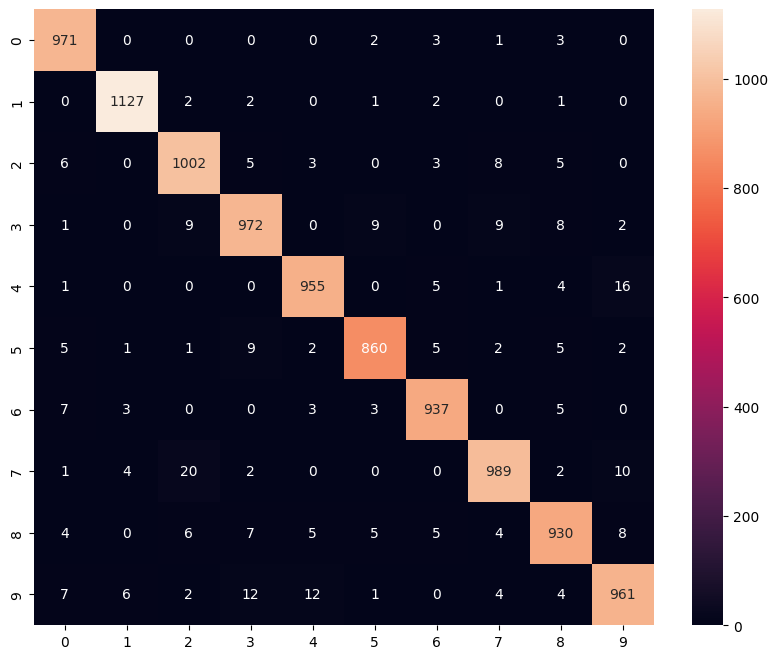


Algunas predicciones (aciertos y errores):


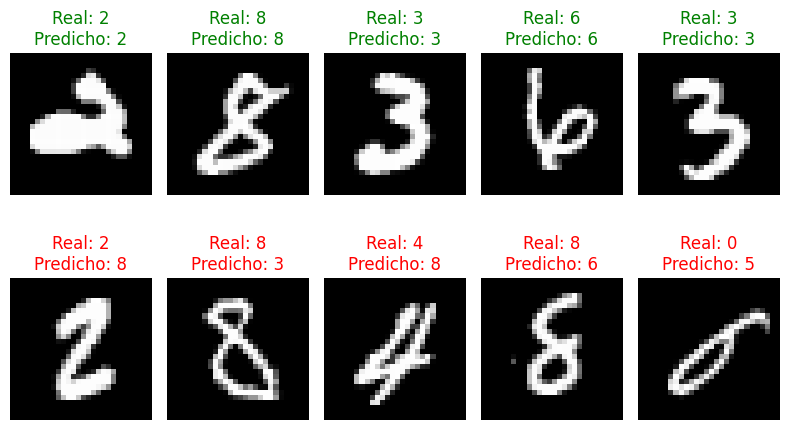

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

# Continuamos con el mejor modelo del paso anterior

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_normalized)

# 1. Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True, fmt='d')
plt.show()

# 2. Visualizar algunas predicciones
def plot_predictions(X, y_true, y_pred, indices=None, n_samples=10):
    if indices is None:
        indices = np.random.choice(len(X), n_samples, replace=False)

    plt.figure(figsize=(8, 5))
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        # Reshapear de vuelta a 28x28
        img = X[idx].reshape(28, 28)
        plt.imshow(img, cmap='gray')

        title = f"Real: {y_true[idx]}\nPredicho: {y_pred[idx]}"
        color = 'green' if y_true[idx] == y_pred[idx] else 'red'
        plt.title(title, color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Encontrar algunos errores interesantes para visualizar
errors = np.where(y_test != y_pred)[0]
if len(errors) > 0:
    error_indices = np.random.choice(errors, min(5, len(errors)), replace=False)
    correct_indices = np.random.choice(np.where(y_test == y_pred)[0], 5, replace=False)
    indices_to_show = np.concatenate([correct_indices, error_indices])
else:
    indices_to_show = np.random.choice(len(X_test), 10, replace=False)

print("\nAlgunas predicciones (aciertos y errores):")
plot_predictions(X_test_normalized, y_test, y_pred, indices=indices_to_show)